In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


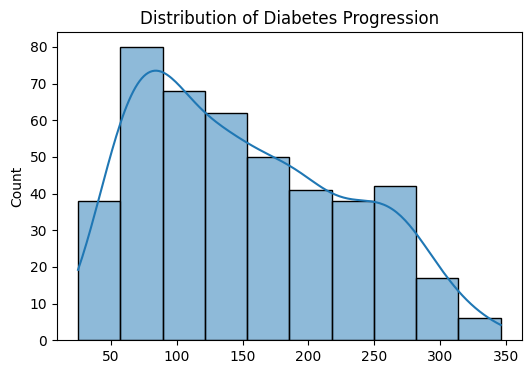

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Distribution of Diabetes Progression")
plt.show()


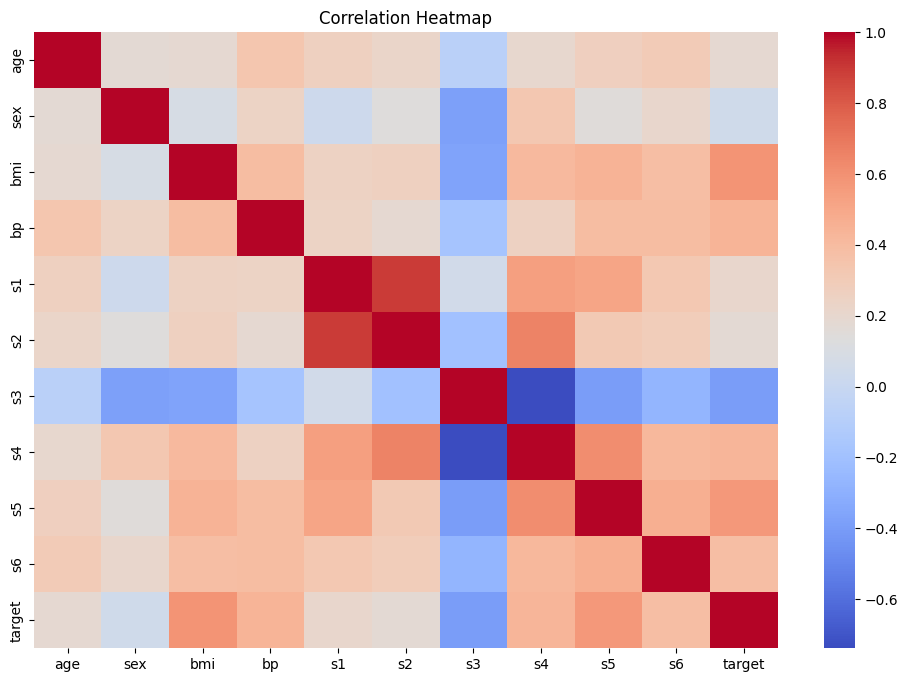

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Regression output
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='mse')
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 33427.9727 - val_loss: 22332.2012
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28261.0332 - val_loss: 22176.4570
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30515.0820 - val_loss: 21988.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33156.2969 - val_loss: 21750.5137
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32438.9062 - val_loss: 21437.9609
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28558.7969 - val_loss: 21044.1660
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28878.0918 - val_loss: 20563.2129
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26615.0312 - val_loss: 19983.6172
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28182.1797 - val_loss: 19277.9824
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27269.4863 - val_loss: 18439.7109
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25279.67

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 2873.1602763009555
R2 Score: 0.4577051748082914


In [11]:
model_improved = Sequential()
model_improved.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1))

model_improved.compile(optimizer='adam', loss='mse')

model_improved.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    verbose=1)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 32560.6387 - val_loss: 22371.2734
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29986.9180 - val_loss: 22134.2578
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31377.5430 - val_loss: 21789.8887
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30577.5547 - val_loss: 21270.4023
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29114.3438 - val_loss: 20525.2266
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27692.4512 - val_loss: 19495.5273
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25750.1543 - val_loss: 18126.5781
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26162.1230 - val_loss: 16343.5654
Epoch 9/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23118.4492 - val_loss: 14302.3359
Epoch 10/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17476.1484 - val_loss: 12042.6221
Epoch 11/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15461.4111 - val_los

In [12]:
y_pred_improved = model_improved.predict(X_test)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved MSE:", mse_improved)
print("Improved R2 Score:", r2_improved)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Improved MSE: 2777.865053155412
Improved R2 Score: 0.47569167796426925


## Conclusion
An ANN model was successfully developed to model diabetes progression.
Feature normalization and model tuning significantly improved performance.
The model provides insights into how medical factors influence diabetes progression.
